In [251]:
import numpy as np
from numpy import linalg
import math
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [252]:
class bond:
   def __init__(self, ISIN, maturity_date, coupon_rate, last_payment, next_payment, price):
    self.ISIN = ISIN
    self.maturity_date = maturity_date
    self.coupon_rate = coupon_rate
    self.last_payment = last_payment    #date of last coupon payment
    self.next_payment = next_payment    #date of next coupon payment
    self.price = price

In [253]:
bond_22_2 = bond("CA135087G328", datetime.date(2022,2,28), 0.50, datetime.date(2021,8,31), datetime.date(2022,2,28), [100.04, 100.03, 100.03, 100.03, 100.02, 100.02, 100.00, 100.00, 100.00, 100.01])
bond_22_7 = bond("CA135087L286", datetime.date(2022,7,31), 0.25, datetime.date(2021,7,31), datetime.date(2022,1,31), [99.80, 99.79, 99.78, 99.77, 99.76, 99.72, 99.70, 99.70, 99.72, 99.74])
bond_23_2 = bond("CA135087H490", datetime.date(2023,2,28), 1.75, datetime.date(2021,8,31), datetime.date(2022,2,28), [100.94, 100.93, 100.91, 100.88, 100.86, 100.76, 100.71, 100.71, 100.71, 100.75])
bond_23_7 = bond("CA135087M359", datetime.date(2023,7,31), 0.25, datetime.date(2021,7,31), datetime.date(2022,1,31), [98.81, 98.80, 98.78, 98.76, 98.74, 98.61, 98.55, 98.55, 98.56, 98.61])
bond_24_2 = bond("CA135087J546", datetime.date(2024,2,29), 2.25, datetime.date(2021,8,31), datetime.date(2022,2,28), [102.31, 102.31, 102.26, 102.22, 102.18, 101.99, 101.91, 101.90, 101.88, 101.97])
bond_24_8 = bond("CA135087J967", datetime.date(2024,8,31), 1.50, datetime.date(2021,8,31), datetime.date(2022,2,28), [100.56, 100.63, 100.62, 100.58, 100.52, 100.29, 100.21, 100.15, 100.17, 100.27])
bond_25_2 = bond("CA135087K528", datetime.date(2025,2,28), 1.25, datetime.date(2021,8,31), datetime.date(2022,2,28), [99.64, 99.67, 99.61, 99.59, 99.49, 99.25, 99.12, 99.11, 99.10, 99.26])
bond_25_8 = bond("CA135087K940", datetime.date(2025,8,31), 0.50, datetime.date(2021,8,31), datetime.date(2022,2,28), [96.66, 96.72, 96.77, 96.77, 96.68, 96.43, 96.26, 96.15, 96.19, 96.31])
bond_26_2 = bond("CA135087L518", datetime.date(2026,2,28), 0.25, datetime.date(2021,8,31), datetime.date(2022,2,28), [95.11, 95.17, 95.12, 95.14, 95.04, 94.75, 94.53, 94.50, 94.52, 94.70])
bond_26_8 = bond("CA135087L930", datetime.date(2026,8,31), 1.00, datetime.date(2021,8,31), datetime.date(2022,2,28), [97.66, 97.70, 97.67, 97.695, 97.585, 97.24, 97.02, 96.96, 97.00, 97.225])
bond_27_2 = bond("CA135087M847", datetime.date(2027,2,28), 1.25, datetime.date(2021,10,14), datetime.date(2022,2,28), [98.41, 98.475, 98.40, 98.44, 98.31, 97.955, 97.70, 97.66, 97.685, 97.94])

In [254]:
bond_list = [bond_22_2, bond_22_7, bond_23_2, bond_23_7, bond_24_2, bond_24_8, bond_25_2, bond_25_8, bond_26_2, bond_26_8, bond_27_2]

In [255]:
time_list = [datetime.date(2022,1,10), datetime.date(2022,1,11), datetime.date(2022,1,12), 
            datetime.date(2022,1,13), datetime.date(2022,1,14), datetime.date(2022,1,17),
            datetime.date(2022,1,18), datetime.date(2022,1,19), datetime.date(2022,1,20),
            datetime.date(2022,1,21)]

In [256]:
def cal_present_value(bond, period: int, day: int, ytm: float):
    # period means number of full half year towards maturity. day means day of Jan 10th to Jan 21st.
    # first calculate present value of face value.
    present_value = 100 * math.exp(-ytm * ((bond.maturity_date - time_list[day]).days / 365))
    # next calculate the total present value of future coupon payments
    for i in range(period + 1):
        present_value += (bond.coupon_rate / 2) * math.exp(-ytm * ((bond.next_payment - time_list[day]).days + i * 365 / 2) / 365)
    return present_value

In [257]:
ytm_dict = {}
for i in range(10):              # i represents day
    ytm_dict[i] = []
    for j in range(len(bond_list)):         # j represents bond
        time = time_list[i] - bond_list[j].last_payment
        dirty_price = bond_list[j].price[i] + bond_list[j].coupon_rate * time.days / 365
        # Use bisection to solve ytm such that present value equals dirty price (within 0.00001).
        ytm_1 = 0
        ytm_2 = 10
        while(abs(cal_present_value(bond_list[j], j, i, (ytm_1 + ytm_2) / 2) - dirty_price) > 0.00001):
            if cal_present_value(bond_list[j], j, i, ((ytm_1 + ytm_2) / 2)) - dirty_price > 0:
                ytm_1 = (ytm_1 + ytm_2) / 2
            else:
                ytm_2 = (ytm_1 + ytm_2) / 2
        ytm_dict[i].append((ytm_1 + ytm_2) / 2 * 100)       # Need to multiple by 100% at the end.
print(ytm_dict)  

{0: [0.2168416976928711, 0.6115734577178955, 0.9189397096633911, 1.0214745998382568, 1.150466501712799, 1.2779608368873596, 1.3634487986564636, 1.439373940229416, 1.4674179255962372, 1.5177838504314423, 1.5982724726200104], 1: [0.2868175506591797, 0.6315708160400391, 0.9257644414901733, 1.029372215270996, 1.149110496044159, 1.2509450316429138, 1.3537853956222534, 1.422882080078125, 1.4528967440128326, 1.5090703964233398, 1.585196703672409], 2: [0.28228759765625, 0.6517767906188965, 0.9414553642272949, 1.0438412427902222, 1.1710971593856812, 1.254536211490631, 1.3734251260757446, 1.409243792295456, 1.4664679765701294, 1.5161298215389252, 1.6006790101528168], 3: [0.27763843536376953, 0.6721615791320801, 0.9660720825195312, 1.0583698749542236, 1.1884644627571106, 1.2696310877799988, 1.3800635933876038, 1.4099255204200745, 1.4621540904045105, 1.5107914805412292, 1.592695713043213], 4: [0.3535747528076172, 0.6927847862243652, 0.9819567203521729, 1.0729506611824036, 1.2058913707733154, 1.292

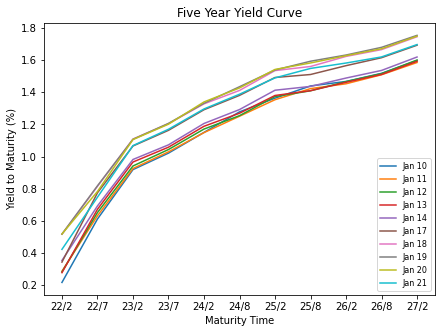

In [258]:
plt.figure(figsize=(7,5))
plt.title('Five Year Yield Curve')
plt.xlabel('Maturity Time')
plt.ylabel('Yield to Maturity (%)')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],labels = ['22/2','22/7','23/2','23/7', '24/2', '24/8', '25/2', '25/8', '26/2', '26/8','27/2'])
date = ['Jan 10', 'Jan 11', 'Jan 12', 'Jan 13', 'Jan 14', 'Jan 17', 'Jan 18', 'Jan 19', 'Jan 20', 'Jan 21']
for i in range(10):
    plt.plot(ytm_dict[i], label = date[i])
plt.legend(loc=4, prop={'size': 8})
plt.savefig('/Users/zhengboyu/Desktop/ytm.png')
plt.show()

In [259]:
def cal_present_value_2(bond, period: int, day: int, spot: list):
    # Similar to ytm, here spot rate depends on time, so it is a list.
    present_value = 100 * math.exp(-spot[-1] * ((bond.maturity_date - time_list[day]).days / 365))
    for i in range(period + 1):
        present_value += (bond.coupon_rate / 2) * math.exp(-spot[i] * ((bond.next_payment - time_list[day]).days + i * 365 / 2) / 365)
    return present_value

In [260]:
spot_dict = {}
for i in range(10):
    spot_dict[i] = []
    for j in range(len(bond_list)):
        time = time_list[i] - bond_list[j].last_payment
        dirty_price = bond_list[j].price[i] + bond_list[j].coupon_rate * time.days / 365
        if j == 0:
            time_to_next_payment = (bond_list[j].next_payment - time_list[i]).days
            spot_dict[i].append(-365/time_to_next_payment*math.log(dirty_price/(100+bond_list[j].coupon_rate/2)))
        else:
            ytm_1 = 0        # For each j, append a new ytm onto the spot rate list and do bisection.
            ytm_2 = 10
            while(abs(cal_present_value_2(bond_list[j], j, i, (spot_dict[i] + [(ytm_1 + ytm_2) / 2])) - dirty_price) > 0.00001):
                if cal_present_value_2(bond_list[j], j, i, (spot_dict[i] + [(ytm_1 + ytm_2) / 2])) - dirty_price > 0:
                    ytm_1 = (ytm_1 + ytm_2) / 2
                else:
                    ytm_2 = (ytm_1 + ytm_2) / 2
            spot_dict[i].append((ytm_1 + ytm_2) / 2 )
for i in range(10):
    for j in range(len(bond_list)):
        spot_dict[i][j] *= 100
print(spot_dict)  

{0: [0.2168364834652681, 0.6116330623626709, 0.9211599826812744, 1.0217875242233276, 1.1554211378097534, 1.2827068567276, 1.3682171702384949, 1.4416351914405823, 1.468554139137268, 1.5229098498821259, 1.606486737728119], 1: [0.28683713457874715, 0.6316006183624268, 0.927850604057312, 1.029670238494873, 1.153796911239624, 1.255124807357788, 1.3584494590759277, 1.4250501990318298, 1.453995704650879, 1.514200121164322, 1.5932843089103699], 2: [0.2823243528153783, 0.6518065929412842, 0.9435266256332397, 1.0441392660140991, 1.1758878827095032, 1.2584701180458069, 1.378186047077179, 1.4111772179603577, 1.467593014240265, 1.5212073922157288, 1.6089566051959991], 3: [0.27761551141354895, 0.6722211837768555, 0.9681731462478638, 1.0586529970169067, 1.193225383758545, 1.273512840270996, 1.384630799293518, 1.4117471873760223, 1.4632046222686768, 1.5155822038650513, 1.6005635261535645], 4: [0.3536376233991047, 0.6928145885467529, 0.9839534759521484, 1.0732263326644897, 1.2106150388717651, 1.2964010

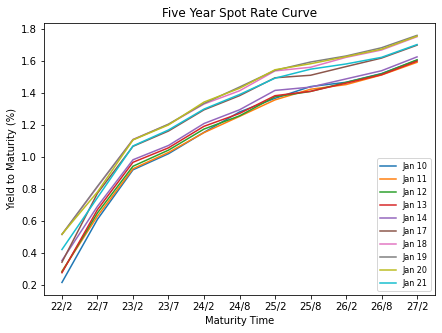

In [261]:
plt.figure(figsize=(7,5))
plt.title('Five Year Spot Rate Curve')
plt.xlabel('Maturity Time')
plt.ylabel('Yield to Maturity (%)')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],labels = ['22/2','22/7','23/2','23/7', '24/2', '24/8', '25/2', '25/8', '26/2', '26/8','27/2'])
date = ['Jan 10', 'Jan 11', 'Jan 12', 'Jan 13', 'Jan 14', 'Jan 17', 'Jan 18', 'Jan 19', 'Jan 20', 'Jan 21']
for i in range(10):
    plt.plot(spot_dict[i], label = date[i])
plt.legend(loc=4, prop={'size': 8})
plt.savefig('/Users/zhengboyu/Desktop/spot.png')
plt.show()

In [262]:
forward_dict = {}
for i in range(10):
    forward_dict[i] = []
    for j in range(2,6):
        forward_dict[i].append((j * spot_dict[i][2 * j] - spot_dict[i][2]) / (j - 1))

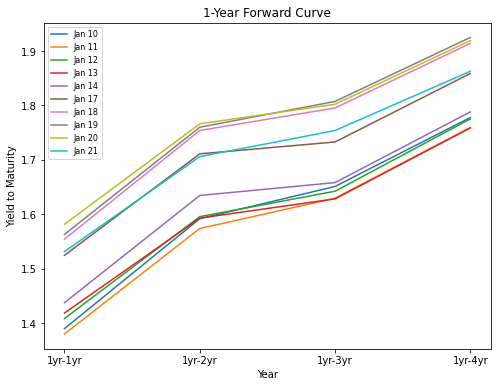

In [263]:
plt.figure(figsize=(8,6))
dates = ['Jan 10', 'Jan 11', 'Jan 12', 'Jan 13', 'Jan 14', 'Jan 17', 'Jan 18', 'Jan 19', 'Jan 20', 'Jan 21']
plt.xlabel('Year')
plt.ylabel('Yield to Maturity')
plt.title('1-Year Forward Curve')
plt.xticks(ticks = [0, 1, 2, 3],labels = ['1yr-1yr', '1yr-2yr', '1yr-3yr', '1yr-4yr'])
for i in range(10):
    plt.plot(forward_dict[i], label = dates[i])
plt.legend(loc=2, prop={'size': 8})
plt.savefig('/Users/zhengboyu/Desktop/forward.png')
plt.show()

In [264]:
ytm_data = []
for i in range(10):
    ytm_data.append(ytm_dict[i])
ytm_data = np.array(ytm_data).T        #ytm_data is a numpy matrix contains all yield data
ytm_matrix = np.delete(ytm_data, [0,1,3,5,7,9], axis=0)    #delete all half-year yield
l = []
for i in range(5):
    l.append([])
    for j in range(9):
        l[i].append(math.log(ytm_matrix[i][j+1] / ytm_matrix[i][j]))    #compute daily log-returns of yield
ytm_matrix = np.array(l)              #build numpy matrix of daily log-returns of yield
ytm_cov = np.cov(ytm_matrix)          #get final covariance matrix
ytm_cov

array([[0.00103176, 0.00084994, 0.00075115, 0.0006993 , 0.00064376],
       [0.00084994, 0.00072964, 0.00065298, 0.00060236, 0.00055904],
       [0.00075115, 0.00065298, 0.00061915, 0.00058003, 0.00054062],
       [0.0006993 , 0.00060236, 0.00058003, 0.00057271, 0.0005287 ],
       [0.00064376, 0.00055904, 0.00054062, 0.0005287 , 0.00049142]])

In [265]:
forward_data = []
for i in range(10):
    forward_data.append(forward_dict[i])
forward_matrix = np.array(forward_data).T    #forward_matrix is a numpy matrix contains all forward rate data
l = []
for i in range(4):
    l.append([])
    for j in range(9):
        l[i].append(math.log(forward_matrix[i][j+1] / forward_matrix[i][j]))
forward_matrix = np.array(l)
forward_cov = np.cov(forward_matrix)
forward_cov

array([[0.00058767, 0.00053783, 0.00049282, 0.00046363],
       [0.00053783, 0.00054952, 0.00051646, 0.00048386],
       [0.00049282, 0.00051646, 0.00052832, 0.00048508],
       [0.00046363, 0.00048386, 0.00048508, 0.00045002]])

In [266]:
ytm_eigenval, ytm_eigenvec = linalg.eig(ytm_cov)      #compute eigenvalue and corresponding eigenvectors of ytm_cov
print(ytm_eigenval)
print(ytm_eigenvec)
forward_eigenval, forward_eigenvec = linalg.eig(forward_cov)
print(forward_eigenval)
print(forward_eigenvec)

[3.30713918e-03 1.10532153e-04 2.03432559e-05 5.53932535e-06
 1.12922737e-06]
[[-0.54508549 -0.63091199 -0.48501757 -0.25546635  0.06577823]
 [-0.46406612 -0.28370827  0.55918053  0.62551154 -0.01430753]
 [-0.42782724  0.22832899  0.5179821  -0.68103416 -0.18087771]
 [-0.40487006  0.48926762 -0.40489264  0.26977372 -0.59998459]
 [-0.3749247   0.47952346 -0.14082466  0.08298719  0.77638281]]
[2.02216416e-03 7.83992665e-05 1.33478511e-05 1.62517033e-06]
[[-0.51598459 -0.77922477 -0.35541503  0.01577389]
 [-0.516758   -0.04282187  0.8361709  -0.17873355]
 [-0.50003523  0.50467802 -0.4060435  -0.5747987 ]
 [-0.46549527  0.36915462 -0.09811759  0.79838084]]
